<a href="https://colab.research.google.com/github/toba717/financial_engineering_projects/blob/main/Discounted_Cash_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discounted Cash Flow 
## Takao Oba
### Assisted by Jimmy

In [162]:
# Finding the intrinsic value of the stock

In [163]:
# Consider past free cash flow (FCF) since that is given through financial data
# We want to compute predicted future free cash flow (FCF)
# Considering the past and predicted, we look forward to finding the fair value of the stock


In [164]:
# Consider the following:
# Required Rate = 7% 
      # personal rate of return that we desire, depends on the investor's risk tolerance level, Working average cost of capital or WACC
# Perpetual Rate = 2%
      # the rate at which we expect apple to grow its future cash flow indefinitely, this number is usually small since even GDP growth is fairly small
# FCF Growth Rate = 3%
      # forecasted cash flow of a company

In [165]:
# Consider the following two formulas

Image by https://www.business-case-analysis.com/discounted-cash-flow.html

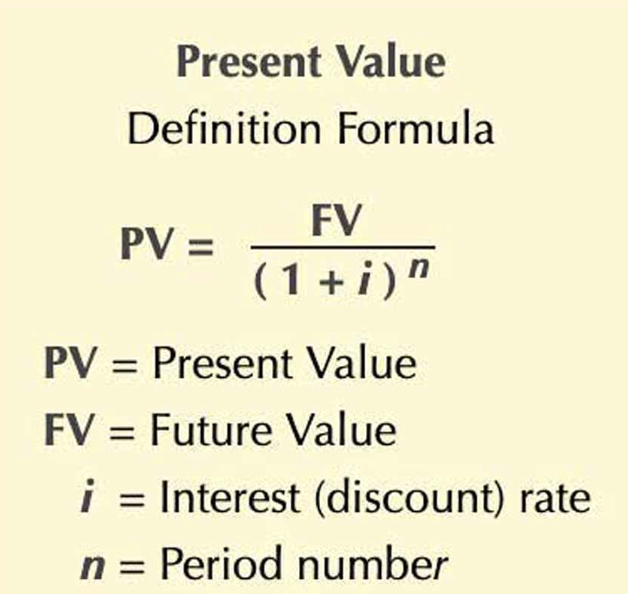

Image by https://levcapital.com/blog/financing/terminal-value-tv/

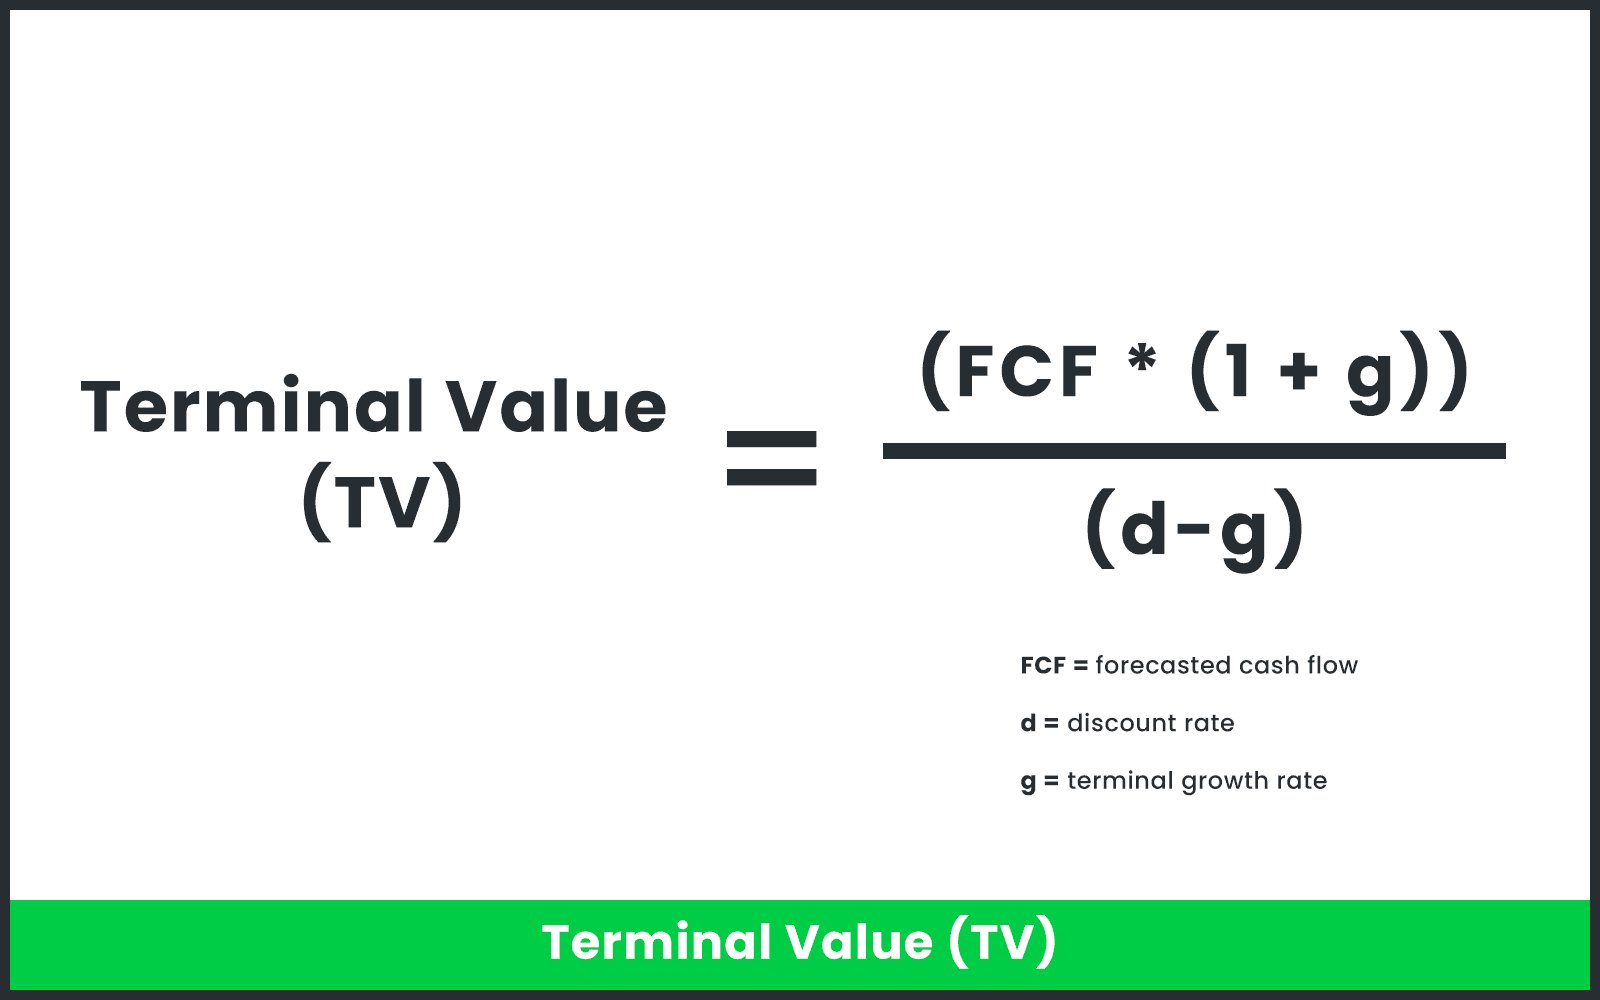

In [166]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
# Calculating the intrinsic value of Apple

aapl = yf.Ticker('aapl')
out_shares = aapl.info['sharesOutstanding']

In [168]:
print(out_shares)

15908100096


In [169]:
# Stated above, we have that the assumptions are:
required_rate = 0.07
perpetual_rate = 0.02
cashflowgrowth_rate = 0.03


In [170]:
years = [1,2,3,4]

# I obtain the free cash flow rates directly from yahoo finance
freecashflow = [58896000, 73365000, 92953000, 111443000]
# recall that above values are all in 1000 dollars

In [171]:
# generating empty lists that will be used in the future
futurefreecashflow = []
discountfactor = []
discountedfuturefreecashflow = []

In [172]:
terminalvalue = freecashflow[-1] * (1 + perpetual_rate) / (required_rate - perpetual_rate) # from TV formula
print(terminalvalue)

2273437200.0


In [173]:
# next, we discount this value using discount factors

for year in years: 
  cashflow = freecashflow[-1] * (1 + cashflowgrowth_rate)**year
  futurefreecashflow.append(cashflow) # add to futurefreecashflow variable
  discountfactor.append((1 + required_rate)**year) # calculate discountfactors

print(futurefreecashflow)
print(discountfactor)

[114786290.0, 118229878.69999999, 121776775.061, 125430078.31283002]
[1.07, 1.1449, 1.225043, 1.3107960100000002]


In [174]:
# divide each element in futurefreecashflow by discountfactor

for i in range(0, len(years)):
  discountedfuturefreecashflow.append(futurefreecashflow[i]/discountfactor[i])

print(discountedfuturefreecashflow) # notice that these values are less than future free cash flow

[107276906.54205607, 103266554.89562406, 99406122.93690915, 95690006.19160414]


In [175]:
discountedterminalvalue = terminalvalue/(1+required_rate)**4 # since terminal value is calculated at the end of year four
discountedfuturefreecashflow.append(discountedterminalvalue)
print(discountedfuturefreecashflow) # notice how the discounted terminal value is added to the list

[107276906.54205607, 103266554.89562406, 99406122.93690915, 95690006.19160414, 1734394354.7707317]


In [176]:
todaysvalue = sum(discountedfuturefreecashflow) # adding all values in the future
print(todaysvalue)
fairvalue = todaysvalue * 1000/out_shares # since the values in yahoo finance was in 1000 $ we have to multiply by 1000

2140033945.336925


In [177]:
print("The fair value of AAPL is ${}".format(round(fairvalue,2)))

The fair value of AAPL is $134.52


In [178]:
# As of 12/28/22, one share of AAPL is $126.04
# Thus, according to our assumption, AAPL is overvalued
# However, note that this value is very sensitive to our assumptions

## Generate a DCF function from what we have shown above

In [179]:
# first attempt at generating the function

def dcfmodel_1(required, perpetual,cashflowgrowth, y, fcf, os):
  future = []
  df = []
  dffcf = []

  tv = fcf[-1] * (1 + perpetual) / (required - perpetual) # from TV formula

  for year in y: 
    cf = fcf[-1] * (1 + cashflowgrowth)**year
    future.append(cf) 
    df.append((1 + required)**year) 
  

  for i in range(0, len(y)):
    dffcf.append(future[i]/df[i])

  dtv = tv/(1+required)**4 
  dffcf.append(dtv)

  today = sum(dffcf) 

  fv = today * 1000/os 
  print("The fair value of AAPL is ${}".format(round(fv,2)))

In [180]:
required_rate = 0.07
perpetual_rate = 0.02
cashflowgrowth_rate = 0.03
years = [1,2,3,4]
freecashflow = [58896000, 73365000, 92953000, 111443000]
out_shares = aapl.info['sharesOutstanding']

dcfmodel_1(required_rate, perpetual_rate, cashflowgrowth_rate, years, freecashflow, out_shares)

The fair value of AAPL is $134.52


In [181]:
# we see that this calculated value is the exact same as before.

In [182]:
# Now, let's try see how the model reacts if we change our assumption rates

# assess when we alter required_rate
required_rate = 0.06
dcfmodel_1(required_rate, perpetual_rate, cashflowgrowth_rate, years, freecashflow, out_shares)

# assess when we alter perpetual_rate
required_rate = 0.07
perpetual_rate = 0.01
dcfmodel_1(required_rate, perpetual_rate, cashflowgrowth_rate, years, freecashflow, out_shares)

# assess when we alter cashflowgrowth_rate
perpetual_rate = 0.02
cashflowgrowth_rate = 0.02
dcfmodel_1(required_rate, perpetual_rate, cashflowgrowth_rate, years, freecashflow, out_shares)


The fair value of AAPL is $167.59
The fair value of AAPL is $115.46
The fair value of AAPL is $133.92


#### We can see how the values fluctuate greatly, if we were to touch upon the assumption values. 
#### We can see that the required_rate seems to influence a greater change.
#### We can also see that the cashflowgrowth_rate does not seem to influence a very dynamic change.
#### These change in values are all very important to note since if we were to alter the perpetual_rate, we could have said that the apple stock is undervalued.
#### Therefore, we should buy the stock.
#### However, in other cases, we would not buy the stock since it is overvalued.

## Making the DCF model with less parameters:

In [183]:
# Combine the years and freecashflow variables into one dictionary
# years as keys and freecashflow as values

def dcfmodel_2(required, perpetual,cashflowgrowth, fcf, os):
  future = []
  df = []
  dffcf = []

  tv = list(fcf.values())[-1] * (1 + perpetual) / (required - perpetual) # from TV formula

  for year in list(fcf.keys()): 
    cf = list(fcf.values())[-1] * (1 + cashflowgrowth)**year
    future.append(cf) 
    df.append((1 + required)**year) 
  

  for i in range(0, len(list(fcf.keys()))):
    dffcf.append(future[i]/df[i])

  dtv = tv/(1+required)**4 
  dffcf.append(dtv)

  today = sum(dffcf) 

  fv = today * 1000/os 
  print("The fair value of AAPL is ${}".format(round(fv,2)))

In [184]:
required_rate = 0.07
perpetual_rate = 0.02
cashflowgrowth_rate = 0.03
fcfdict = {1:58896000,2:73365000,3:92953000,4:111443000}
out_shares = aapl.info['sharesOutstanding']

dcfmodel_2(required_rate, perpetual_rate, cashflowgrowth_rate, fcfdict, out_shares) # This presents the same values as before

The fair value of AAPL is $134.52


In [185]:
# Combine all the rate assumptions into one list

def dcfmodel_3(assumptions, fcf, os):
  required = assumptions[0]
  perpetual = assumptions[1]
  cashflowgrowth = assumptions[2]
  future = []
  df = []
  dffcf = []

  tv = list(fcf.values())[-1] * (1 + perpetual) / (required - perpetual) 

  for year in list(fcf.keys()): 
    cf = list(fcf.values())[-1] * (1 + cashflowgrowth)**year
    future.append(cf) 
    df.append((1 + required)**year) 
  

  for i in range(0, len(list(fcf.keys()))):
    dffcf.append(future[i]/df[i])

  dtv = tv/(1+required)**4 
  dffcf.append(dtv)

  today = sum(dffcf) 

  fv = today * 1000/os 
  print("The fair value of AAPL is ${}".format(round(fv,2)))

In [186]:
required_rate = 0.07
perpetual_rate = 0.02
cashflowgrowth_rate = 0.03
assump = [required_rate,perpetual_rate,cashflowgrowth_rate]
fcfdict = {1:58896000,2:73365000,3:92953000,4:111443000}
out_shares = aapl.info['sharesOutstanding']

dcfmodel_3(assump, fcfdict, out_shares) # This presents the same values as before

The fair value of AAPL is $134.52


In [187]:
# However, this can be dangerous if the rates are placed in different orders
# I will utilize the second function as our final model function
# Fine tune the function so that the function works for other stocks

def dcfmodel(required, perpetual,cashflowgrowth, fcf, tickersymbol):
  # initializing lists
  future = []
  df = []
  dffcf = []

  tv = list(fcf.values())[-1] * (1 + perpetual) / (required - perpetual)  # calculate the terminal value through formula

  # the discount rate increases as we look into the further future
  # calculate the discount values for each corresponding year
  for year in list(fcf.keys()): 
    cf = list(fcf.values())[-1] * (1 + cashflowgrowth)**year
    future.append(cf) 
    df.append((1 + required)**year) 
  
  # taking the discount rate into account, calculate the future free cashflow
  for i in range(0, len(list(fcf.keys()))):
    dffcf.append(future[i]/df[i])

  # the terminal value should also be discounted 
  dtv = tv/(1+required)**4 
  dffcf.append(dtv) # append this to our discounted future free cashflow

  today = sum(dffcf) # calculate the value for today

  stockname = yf.Ticker(tickersymbol)
  os = stockname.info['sharesOutstanding']
  fv = today * 1000/os # fair value would be today's value divided by the outstanding shares in the market
  print("The fair value of {} is ${}".format(tickersymbol,round(fv,2))) # print fair value back to the users

## Look into other stocks! (I will keep the required rate and FCF growth rate constant for all stocks)

### I will look into one stock each from major sectors in the market

### **Energy**

In [188]:
# ExxonMobil (NYSE:XOM)
required_rate = 0.07
perpetual_rate = 0.005 # We don't expect XOM to grow as much as AAPL
cashflowgrowth_rate = 0.03
fcfdict = {1:16440000,2:5355000,3:-2614000,4:36053000}
stock = 'XOM'

dcfmodel(required_rate, perpetual_rate, cashflowgrowth_rate, fcfdict, stock) # This presents the same values as before

The fair value of XOM is $135.13


##### The current value of XOM is 108.38

### **Materials**

In [189]:
# DuPont (NYSE:DD)
fcfdict = {1:760000,2:-1268000,3:2831000,4:-956000}
stock = 'DD'
perpetual_rate = 0.005

dcfmodel(required_rate, perpetual_rate, cashflowgrowth_rate, fcfdict, stock) # This presents the same values as before

The fair value of DD is $-29.7


##### The current value of DD is 67.80

### **Industrials**

In [190]:
# Boeing (NYSE:BA)
fcfdict = {1:13531000,2:-4407000,3:-19713000,4:-4396000}
stock = 'BA'
perpetual_rate = 0.01

dcfmodel(required_rate, perpetual_rate, cashflowgrowth_rate, fcfdict, stock) # This presents the same values as before

The fair value of BA is $-121.57


##### The current value of BA is 188.38

### **Financials**

In [191]:
# JPMorgan Chase (NYSE:JPM)
fcfdict = {1:14187000,2:6046000,3:-79910000,4:78084000}
stock = 'JPM'
perpetual_rate = 0.01

dcfmodel(required_rate, perpetual_rate, cashflowgrowth_rate, fcfdict, stock) # This presents the same values as before

The fair value of JPM is $438.76


##### The current value of JPM is 132.46

### **Consumer Discretionary**

In [192]:
# Amazon.com (NASDAQ:AMZN)
fcfdict = {1:17296000,2:21653000,3:25924000,4:-14726000}
stock = 'AMZN'
perpetual_rate = 0.05

dcfmodel(required_rate, perpetual_rate, cashflowgrowth_rate, fcfdict, stock) # This presents the same values as before

The fair value of AMZN is $-63.07


##### The current value of AMZN is 81.82

### **Consumer Staples**

In [193]:
# Coca-Cola (NYSE:KO)
fcfdict = {1:6280000,2:8417000,3:8667000,4:11258000}
stock = 'CO'
perpetual_rate = 0.001

dcfmodel(required_rate, perpetual_rate, cashflowgrowth_rate, fcfdict, stock) # This presents the same values as before

The fair value of CO is $1236.42


##### The current value of CO is 63.57

# Concluding Thoughts

## In this project, I have expressed the discounted cash flow method in Python. DCF is a type of valuation method that estimates the investment's value utilizing the expected future cash flows.
## I generated a function that outputs the fair value of the equity simply through inputting the required rate, perpetual rate, cash flow growth rate, free cash flow, and the tickersymbol of the stock we want to measure.
## The model has room for improvement as it have provided a close estimate for AAPL, but have diverged for stocks in the other sectors. I have noticed that the model tends to fail when negative free cash flow are indicated in the statement of cash flow. Additionally, the fair value heavily depends upon the approximations that we initially make. To get a better estimate of the stock, other factors of the company can be incorporated as well.